In [1]:
'''
tp = TextProcessor
# is, ASAP !!!!
df = tp.apply_contractions(df, col)
# is, AS SOON AS POSSIBLE !!!!
df = tp.remove_nonAlphanumeric(df, col)
# is  AS SOON AS POSSIBLE
df = tp.to_lower(df, col)
# is  as soon as possible
df = tp.apply_lemmatization(df, col)
# be  as soon as possible
df = tp.remove_stopwords(df, col)
#        soon    possible
df = tp.remove_extra_spaces(df, col)
# soon possible
# '''

# features: only comment after processing

'\ntp = TextProcessor\n# is, ASAP !!!!\ndf = tp.apply_contractions(df, col)\n# is, AS SOON AS POSSIBLE !!!!\ndf = tp.remove_nonAlphanumeric(df, col)\n# is  AS SOON AS POSSIBLE\ndf = tp.to_lower(df, col)\n# is  as soon as possible\ndf = tp.apply_lemmatization(df, col)\n# be  as soon as possible\ndf = tp.remove_stopwords(df, col)\n#        soon    possible\ndf = tp.remove_extra_spaces(df, col)\n# soon possible\n# '

In [2]:
from utils import DataLoader, Metrics 
from classifiers import RandomForest, DecisionTree, LSVM, AdaBoost, XGBoost

In [3]:
data = DataLoader()
X_train, X_test, y_train, y_test = data.datasets

Elapsed Time: 164.6523 seconds
RandomForestClassifier(max_depth=32, min_samples_split=5, n_estimators=400)
Train Accuracy: 0.9313, F1: [0.9599 0.9778 0.8851 0.9168]
Test  Accuracy: 0.5803, F1: [0.6923 0.4478 0.5294 0.5747]


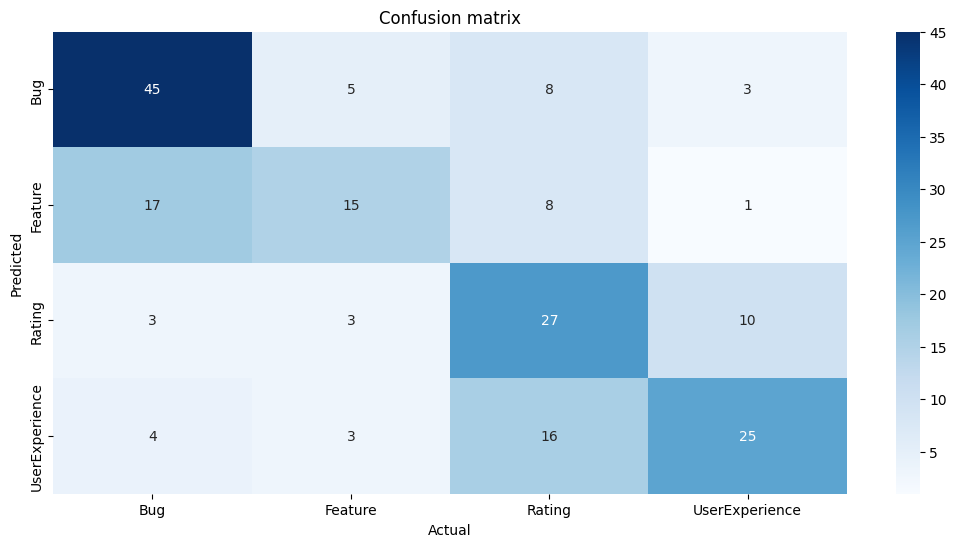

Elapsed Time: 16.326 seconds
DecisionTreeClassifier(criterion='entropy', max_depth=17, min_samples_split=16)
Train Accuracy: 0.6969, F1: [0.7703 0.729  0.6676 0.6205]
Test  Accuracy: 0.4508, F1: [0.4865 0.3659 0.521  0.3784]


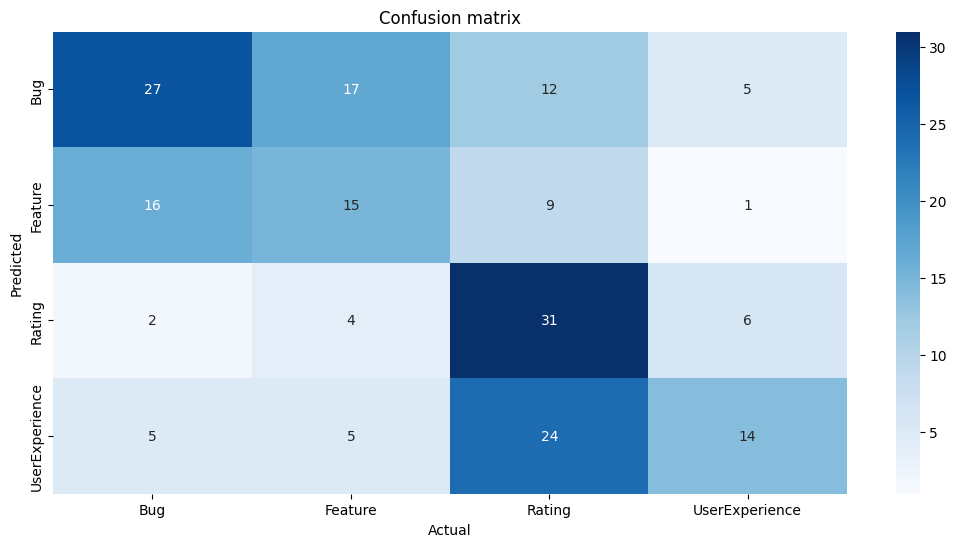

Elapsed Time: 17.3943 seconds
LinearSVC(C=1, dual=False, multi_class='crammer_singer', penalty='l1')
Train Accuracy: 0.8077, F1: [0.8091 0.7854 0.8123 0.819 ]
Test  Accuracy: 0.6166, F1: [0.704  0.5714 0.6078 0.5366]


d:\Programs\Anaconda\envs\668\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


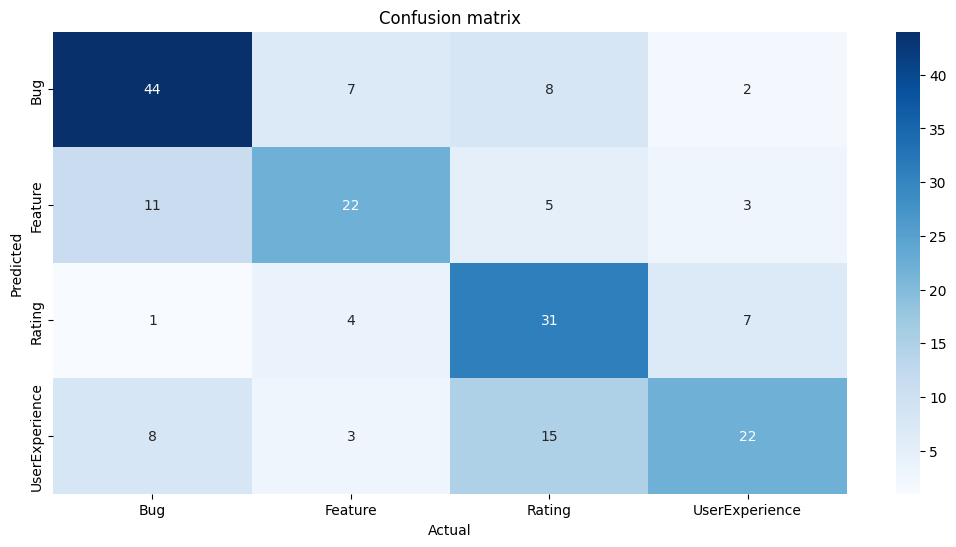

Elapsed Time: 5.4566 seconds
AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=LinearSVC(C=100, dual=False),
                   learning_rate=0.01)
Train Accuracy: 0.7811, F1: [0.7993 0.6993 0.8041 0.8   ]
Test  Accuracy: 0.5907, F1: [0.6772 0.5143 0.56   0.5618]


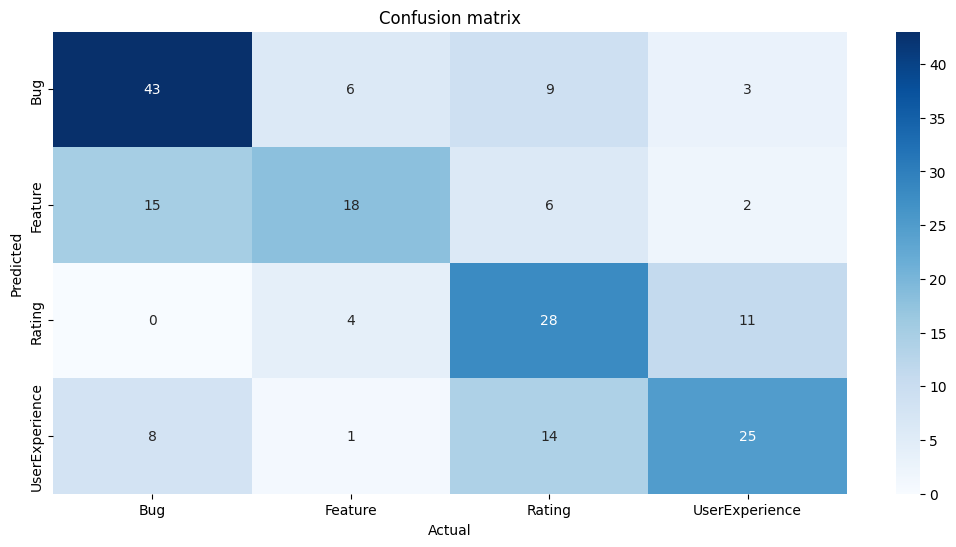

Elapsed Time: 307.3518 seconds
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.8077204446712954, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              gamma=0.1343756421264869, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.32101602307786326, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=3, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=112, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, ...)
Train Accuracy: 0.9185, F1: [0.9493 0.9351 0.8933 0.8991]
Test  Accuracy: 0.6218, F1: [0.7227 0.5385 0.6095 0.5714]


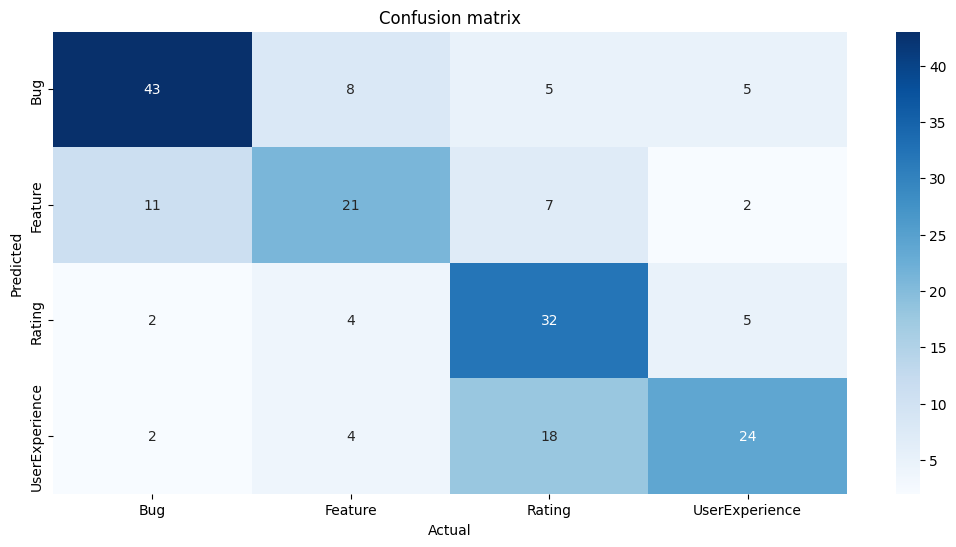

In [4]:
clfs = [RandomForest, DecisionTree, LSVM, AdaBoost, XGBoost]

for clf in clfs:
    model = clf()
    model.model_selection(X_train, y_train)
    print(model.clf)

    Metrics.report(model, X_train, X_test, y_train, y_test)
    pred = model.predict(X_test)
    Metrics.plot_confusion_matrix(y_test, pred, data.labels)